## Problem Statement
The Portuguese Bank had run a telemarketing campaign in the past, making sales calls for a term-deposit product. Whether a prospect had bought the product or not is mentioned in the column named 'response'.

The marketing team wants to launch another campaign, and they want to learn from the past one. You, as an analyst, decide to build a supervised model in R/Python and achieve the following goals:
• Reduce the marketing cost by X% and acquire Y% of the prospects (compared to random calling), where X and Y are to be maximized
• Present the financial benefit of this project to the marketing team
Data
The data and the dictionary can be found here(https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ). Please use the bank-additional-full.csv data set.

Please share your response here : https://goo.gl/forms/y7YZThccjkmBcK8F3

Warm Regards

In [2]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix
import numpy as np

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('bank-additional-full.csv',sep = ";")
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
#print(data.columns.values.tolist)
data.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
print(data['y'])

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
41158    yes
41159    yes
41160    yes
41161     no
41162     no
41163    yes
41164    yes
41165    yes
41166    yes
41167     no
41168     no
41169     no
41170     no
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
41176     no
41177     no
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object


### Let us now see how many are converted to actual sales.

In [ ]:
#response: Stores results of each cell
response = data["y"]

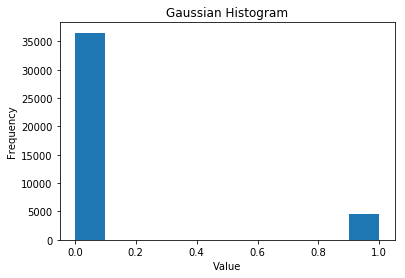

In [ ]:
#converts yes to 1 and no to 0 for ploting
def plot_yes_no(response):
    global binary
    binary = []
    for i in range(response.shape[0]):
       if(response[i] == "yes"): binary.append(1) 
       elif(response[i] == "no"): binary.append(0)
       else : print("Error")
    plt.hist(binary)
    plt.title("Gaussian Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
#calls plotting function defined above   
plot_yes_no(response)

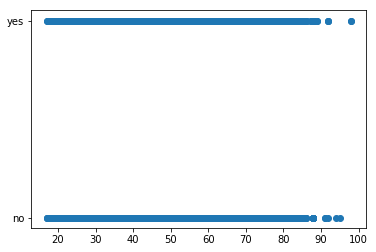

In [ ]:
plt.scatter(data['age'], data['y'])
plt.show()

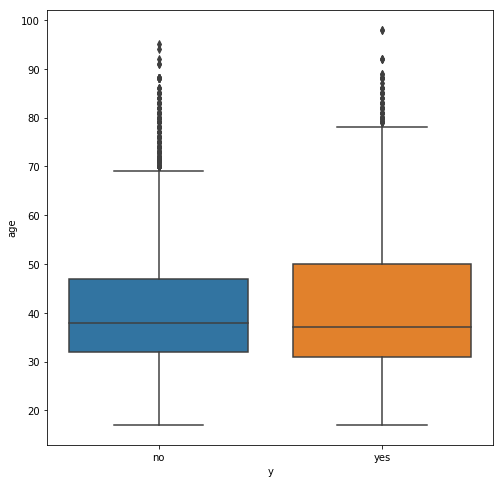

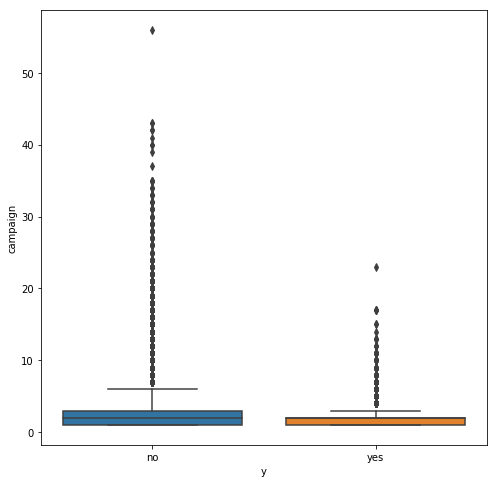

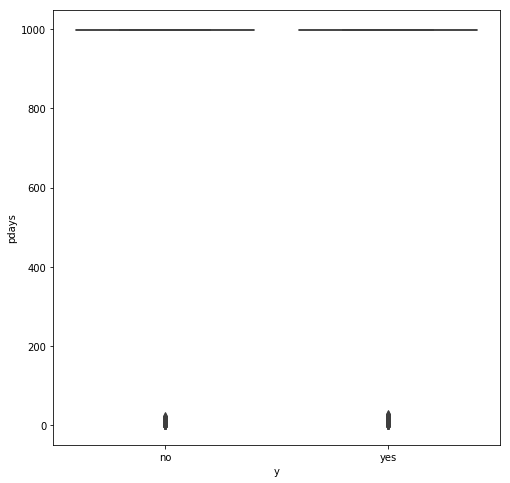

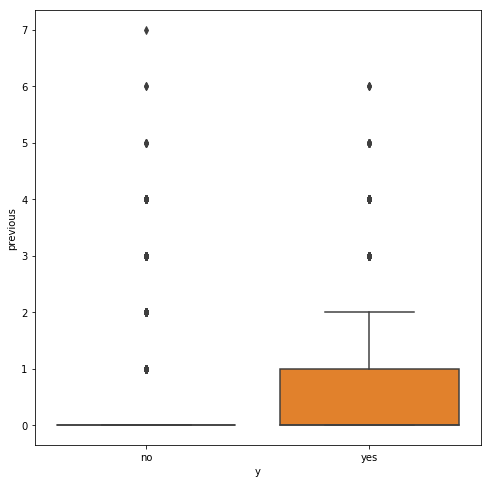

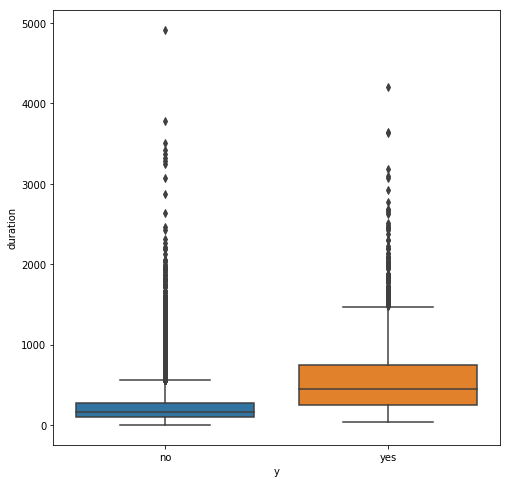

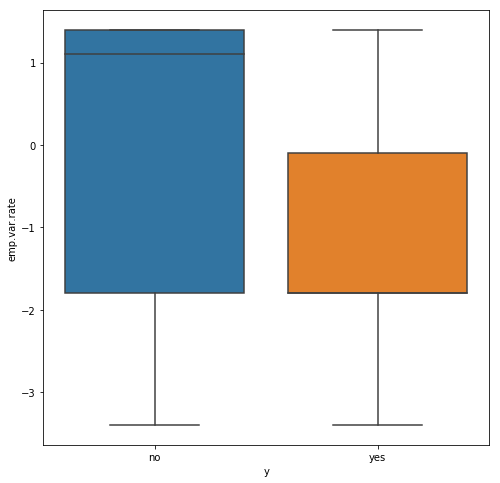

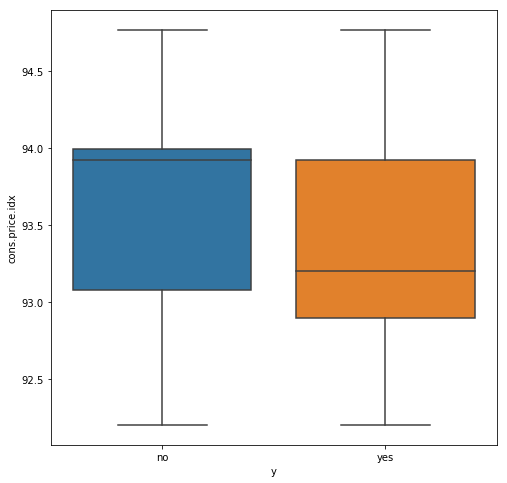

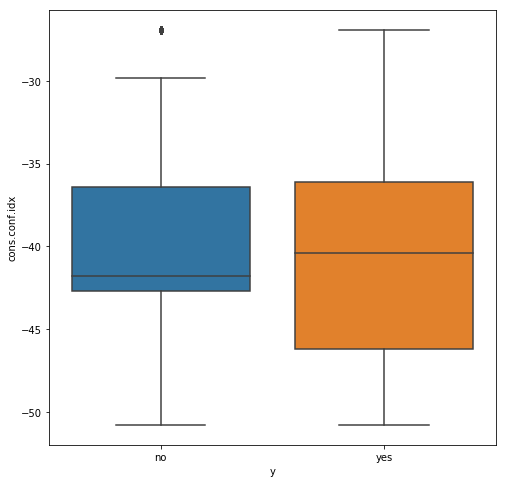

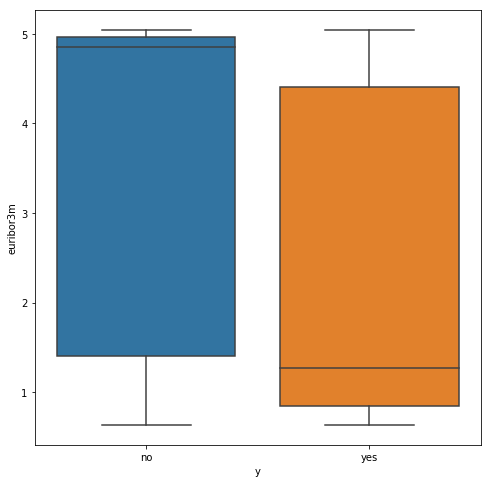

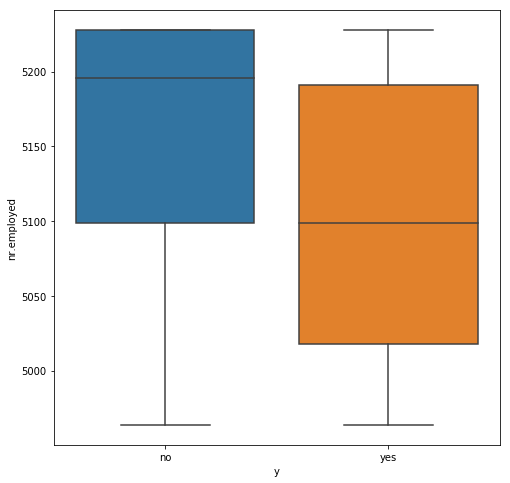

In [ ]:
import seaborn as sns 
numeric_vars=["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
categorical_vars=[i for i in data.columns if i not in numeric_vars]
categorical_vars.remove("y")
target="y"

for i in numeric_vars:
    plt.figure(figsize=(8,8))
    sns.boxplot(x=target,y=i,data=data)
    plt.show()

In [ ]:
data_dict = data.T.to_dict().values()

In [ ]:
vec = DictVectorizer()
signal_array = vec.fit_transform(data_dict).toarray()
feature_names = vec.get_feature_names()
df = pd.DataFrame(signal_array,columns=feature_names)
df.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X = signal_array[:,:-2]
X = np.hstack((X[:,:14],X[:,15:]))
y = signal_array[:,-1]
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

Using feature importance we can see that below are the top 3 most important features. 
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)

# Conversion vs Feature
Now we will plot various features vs if the customer took the policy

In [ ]:
#list of columns we have
print(feature_names)

In [ ]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=df, truncate=True)

In [ ]:
ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=df, truncate=True)

In [ ]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=df, truncate=True)

## Observations:
     After 20 times campaign the converstion is almost zero so we can stop calling after 20 times. If there is any requirements further reduce the marketing cost we can stop calling after 15 times as there are very few conversion after it. Here i am dropping campaign after 20.


In [ ]:
# Total Conversion ratio
np.sum(df['y=yes'])/np.sum(df['campaign'])

In [ ]:
# Now let's see efficiancy on every additional call
print("Nth Call \t Efficiency")
for i in range(1,30):
    goo = np.sum(df.loc[df['campaign']==i]['y=yes']) / float(df.loc[df['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

In nr.employed  we didn'find thing to optimize.

## Finding patterns in Age

We have divided the age into 10 groups and compared their efficiency in Nth call.

In [ ]:
print("For age upto 30")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
#till 7th call

In [ ]:
print("For age between 30-40")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 40) & (df['age'] > 30) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

In [ ]:
print("For age between 40-50")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 50) & (df['age'] > 40) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

In [ ]:
print("For age between 50-60")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = 1+float(df[(df['age'] <= 60) & (df['age'] > 50) & (df['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))
#till 9th call

In [ ]:
print("For age above 60")
print("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(df[(df['age'] > 60) & (df['campaign']==i) & (df['y=yes']==1)].shape[0])
    den = float(df[(df['age'] > 60) & (df['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

There is no extreme pattern observed in age wise conversion upto Nth call. If required we can call till 9th and 7th time 
for age group 50-60 and upto 30 age.

In [ ]:
# Calculate how many calls were made in total
total_calls = np.sum(df['campaign'])
print(total_calls)

In [ ]:
# Calculate how many calls were made after the 6th call
extra_calls = np.sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

In [ ]:
# Calculate reduction in marketing cost
reduction = ( extra_calls *100 ) / total_calls
print(reduction)

In [ ]:
total_sales=np.float(df[df['y=yes']==1].shape[0])
print(total_sales)

In [ ]:
less_costly_sales=np.float(df[(df['campaign'] <= 6) & (df['y=yes']==1)].shape[0])
print(less_costly_sales)

In [ ]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

Now suppose we can call till 9th and 7th time for age group 50-60 and upto 30 age.

In [ ]:
# Calculate how many calls were made after the 6th call
extra_calls = np.sum(df[df['campaign']>6]['campaign']) - 6*df[df['campaign']>6].shape[0]
print(extra_calls)

### If we don't call the customers we can reduce marketing cost by 11.4% with retaining  97.6% sales.